# Hacettepe University 
# Computer Science and Engineering Department

# 2020-2021 Spring Term
# BBM409 Course Assignment -2 Report




## Alihan KARATATAR
## 21904324


# Part I. Theory Questions
## Question 1 MLE
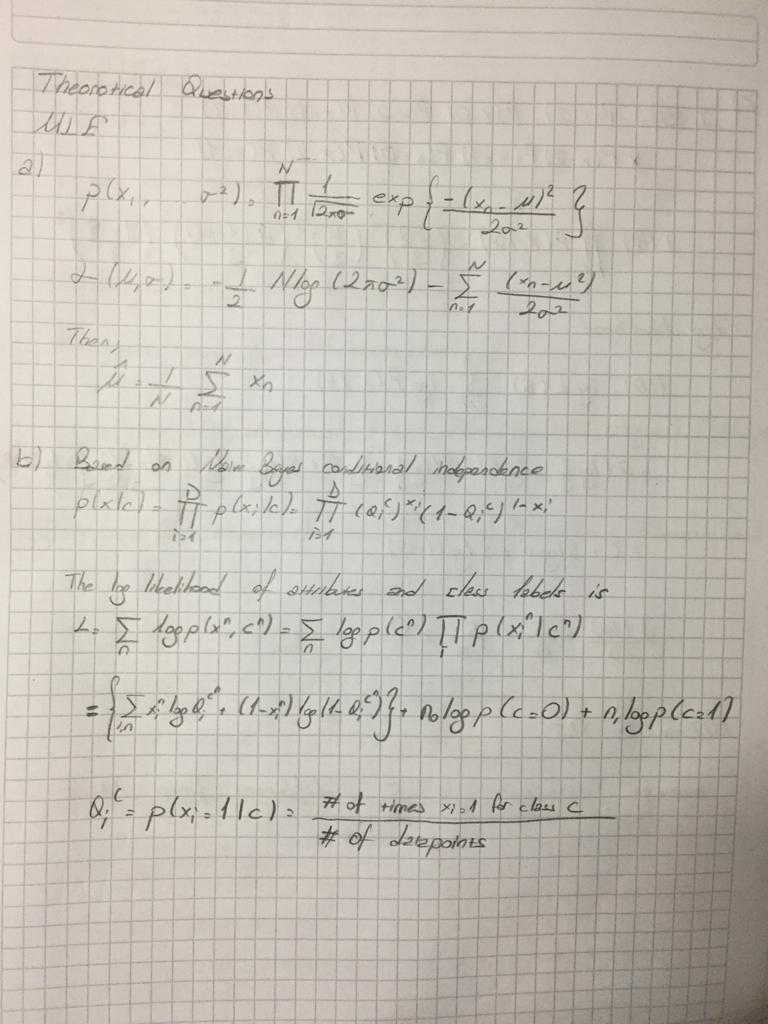






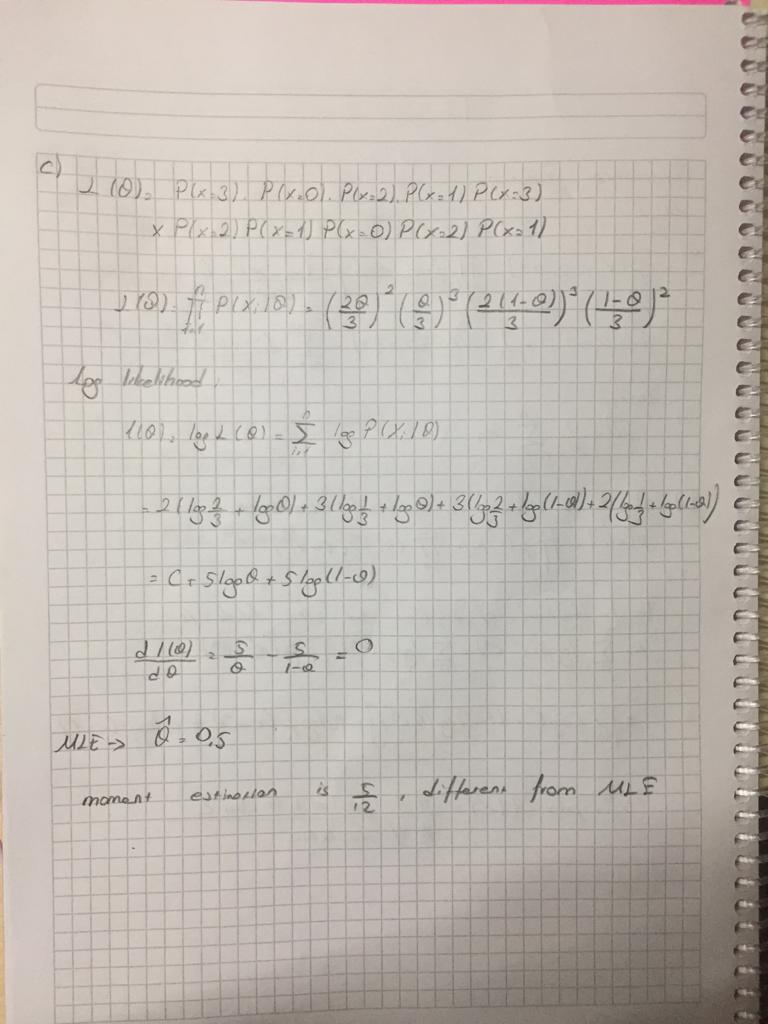

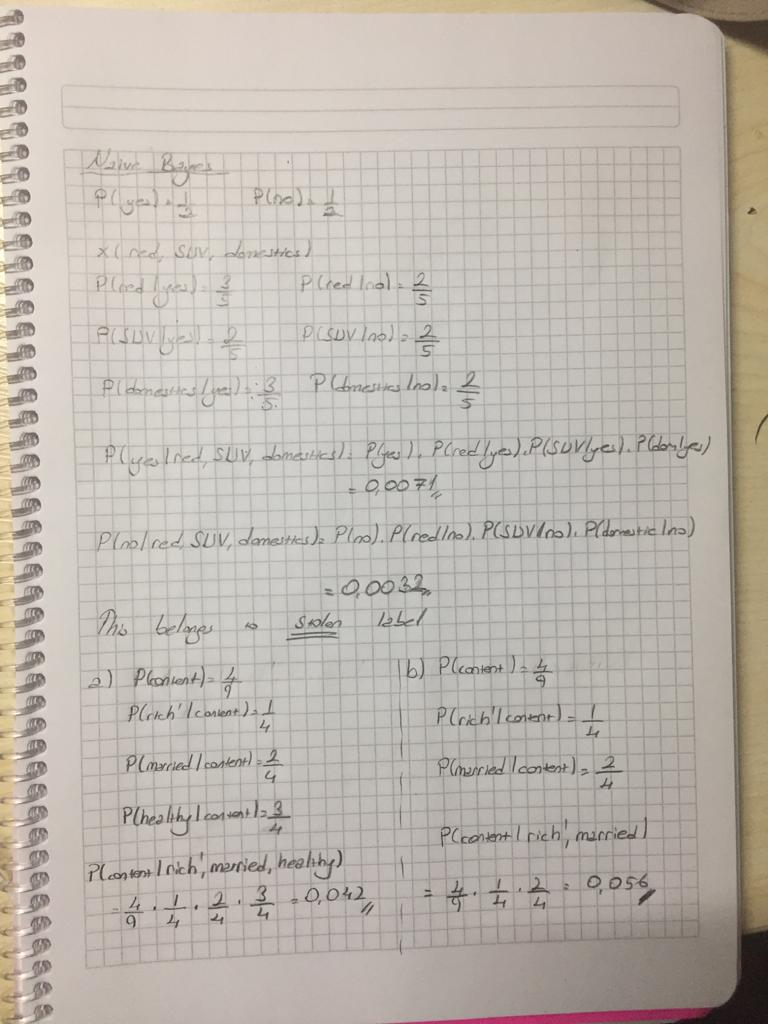

# PART II. Sentiment Analysis with Naive Bayes
## Introduction

This report is about my second assignment on BBM409 lecture in Hacettepe University In this assignment I tried to implement naive bayes classifier which is widely used in machine learning area.It is a classifier that easy to use, yet strong and mostly used for text classification like real-fake detection.

The data set is about product reviews. Some of them are positive and rest is negative.

In this assignment given nearly 12000 review, we are going to try whether test reviews positive or negative. 

## Approach

### Understanding Data


First, I start with splitting data and docking them into a pandas DataFrame, but in further I realized that it would be tedious for me and I start over. The data has 4 element and which are topic category label, sentiment category label, document identifier and document tokens.

We are going to try to estimate sentiment category label by checking document token for each line. We use Naive Classifier for that which is very suitable classifier for text classification. We classify our test reviews into 2 categories which are positive and negative.

There are 6000 positive reviews in train data. In this reviews, "love" word passes 1788 times, "excellent" word passes 557 times and "good" word passes 2104 times

Besides, there are 5914 negative reviews in train data. In this reviews, "hate" word passes 550 times, "terrible" word passes 456 times and "bad word passes 1958 times

### Implementing Naive Bayes

In this assignment we use multinomal Naive Bayes Model to keep reviews in bag of words structure. I designed my algorithm with N-gram based model.

A contiguous series of things of length n is known as an N-gram. It may be a string of letters, bytes, syllables, or sentences. Word-based and character-based n-grams are the most often used n-gram models of text categorization. Unigram (n=1), bigram (n=2), and other n-gram versions are widely used. In this assignment, I calculate my result for unigram, bigram and unigram + bigram. If you want to see the differences among them, you can change the relevant code part. I stated them as comments in my program.

At first, I want to clarify how i implement Naive Bayes. In the beginning of my code I imported necessary libraries. Then I went with, openning file line by line and splitting those lines. After that I placed splitted lines into 4 different arrays to manipulate them easily.

Later, I split my data set in two, train and test, by 0.8 portion. I seperated positive and negative reviews in train set. Finally, they are ready for bag of word process. In below you can see related code for bag of word.

In [ ]:
posBow = CountVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None, ngram_range=(1,1))
posBows_ = posBow.fit_transform(posRevs)
posCtr = posBows_.toarray().sum(axis=0)
posDict = dict(zip(posBow.get_feature_names(), posCtr))


Here as you can see there is a small part of my code related to bag of word. It processed positive reviews and it also applied for negative reviews and test reviews seperately. You can see there are some parameters in CountVectorizer function. First of all I want to start with ngram_range. It is (1,1) as it seen. This settlement is for unigram option which words taken by individually. If you arrange it (2,2), it would work for bigram option which is words taken by pairly. You can also arrange it (1,2) and this is for both unigram and bigram at same time. stop_words parameter stated as None here for just showing purposes. If you want to see how activating stop words affects accuracy you can change it also. Last token_pattern arranged because when it comes to bigram, default token_pattern throws an empty word error, because there can be 2 or more 1 letter word in sequence in the English language. Here I prepeared a dictionary named posDict to make it easy to manipulate data.

After applying BoW for both positive and negative revies, now it comes to prepeare naive bayes. I prepeared necessary data for this. like set of words, positive and negative word counters and log probability of positive and negative reviews seperately.

For implementing Naive Bayes, first I started with applying BoW for test reviews and I prepeared a dictionary for better manipulating same as I explained above. I applied Laplace smoothing in here. I am not sharing code part in my report but you can see it clearly in my code. I write a comment about it. After calculation related probabilities, I checked which one is greater for all lines in test data, and append result array due to this. Then I calculate accuracy and print it on screen.

After 10 times running I represent my accuracies as a table below.

| Unigram  | Bigram  |Unigram+Bigram |
| :- | -: | :-: |
| 79 | 85 | 82  | .



### Error Analysis

In here I am giving you a real example of output of my code.

'i saw this film a few years back on tv and really enjoyed it , but i notice it is presented in full screen format . is this the correct aspect ratio ? i hate to buy a botched pan / scan version....can anyone help me out ? ? ? ? ? ?
"

This comment is originally considered as positive. If you read it, you would see, it is positive indeed. Yet, my program classified it as a negative review. Since , this comment includes words like "hate","but", "help" it considered as negative by my code.

The next comment is originally negative, again if you read it you would see it is negative definetly. But this comment is too long and this is hard to classify because so many words inside of it. Because of that my program considered it as a positive review

"after breaking the collective hearts of the soft rock-loving populace by leaving the powerhouse group chicago , traitor cetera made a half-baked attempt to reconcile himself with his fanbase by recording this stinker . it 's coincidental that the first track is titled " big mistake " , as if traitor knew his leaving one of the premier groups of our time was the worst decision he would ever make . i bought this album way back in 1986 with some birthday money , and after i had listened to the album once , i made myself go and apologize to all of my family members for wasting their money so foolishly . what else is here ? oh , you have the " karate kid ii " ballad " glory of love " , a tune so nauseating it 's made me completely ignore the second film in the canon , and go straight from the original " karate kid " to " iii " and " next " whenever i do my yearly film marathon . i just pretend the second film never existed . it also has the semi-smash " next time i fall " , where traitor makes it a point to hog the spotlight completely from guest vocalist amy grant . in short , if you a ) thought cetera 's leaving chicago was a great decision , or b ) like your music pointless and nauseating , by all means get this album . if you want music with real heart and soul , just go buy some chicago . you 'll be glad you did"




### Modul Analysis

I applied TfIdf method on my dataset positive ones and negatives separetely. Then, I place them into dictionaries. The most higher frequency has the most affected sentiment on review. I write down my codes output below. You can try it on yourself.

For 10 words whose presence most strongly predicts that the review is positive, I get highet frequencied positive words.
You can see the output of my code below.

10 words whose presence most strongly predicts that the review is positive.

+ ('great', 117.01866942245726)
+ ('book', 101.33671959580582)
+ ('camera', 97.59055667403055)
+ ('good', 91.13908367070385)
+ ('like', 84.86304208483753)
+ ('use', 84.7849375649679)
+ ('just', 77.63305337609202)
+ ('product', 70.37510621557094)
+ ('movie', 69.06614382310218)
+ ('love', 68.56536502605874)

For 10 words whose presence most strongly predicts that the review is negative, I get highet frequencied negative words.
You can see the output of my code below.

10 words whose presence most strongly predicts that the review is negative.

+ ('book', 108.69839958031326)
+ ('camera', 96.77314674096661)
+ ('like', 90.66809115789661)
+ ('just', 88.39685870352662)
+ ('good', 74.26891749687776)
+ ('product', 73.2410452299324)
+ ('did', 72.43737327499389)
+ ('movie', 71.35024820656069)
+ ('does', 70.18069571402896)
+ ('time', 65.76987188540396)


For 10 words whose absence most strongly predicts that the review is positive, I took differences between positive word dictionary and negative word dictionary. (positiveD-negativeD)

10 words whose absence most strongly predicts that the review is positive.

+ ('suffering', 0.12737845536120332)
+ ('sounds', 0.21392165162451654)
+ ('private', 0.14421538562442537)
+ ('body', 0.18028991012973006)
+ ('coursebook', 0.10216305191187584)
+ ('qvc', 0.14647823067907234)
+ ('kate', 0.4344797385305576)
+ ('walking', 0.09207510362005078)
+ ('opus', 0.0751535876264714)
+ ('exponentially', 0.06827492760907171)


For 10 words whose absence most strongly predicts that the review is negative, I took differences between negative word dictionaru and poditive word dictionary. (negativeD-postiveD)

- 10 words whose absence most strongly predicts that the review is positive.

+ ('appearances', 0.113331030052792)
+ ('primitive', 0.028332757513198)
+ ('starts', 0.4096766421219638)
+ ('occurred', 0.028332757513198)
+ ('liked', 0.35141901149482696)
+ ('definite', 0.028332757513198)
+ ('recently', 0.0727197206301303)
+ ('byrnison', 0.04522940259240753)
+ ('mentioned', 0.13437773102196363)
+ ('aircract', 0.12510115749830372)


### Calculation Accuracy

Due to result coming from naive bayes I predict a sentiment for each line, and I append a result array with them. After that, I compare these result with the original sentiments and calculate accuracy in percentage.